# Ruwheidswaarden schatten uit stuwmetingen

In dit voorbeeld nemen we de volgende stappen:

1. We laden een gebiedsbeschrijving
2. We inspecteren het systeem visueel
3. We draaien het model ongeijkt en bekijken de uitvoer
4. We draaien de automatische kalibratie, en vergelijken de modeluitvoer nogmaals met metingen

## Software
Het *Dottermodel* is een Python module. Na installatie is het beschikbaar om geimporteerd te worden:

In [7]:
%matplotlib notebook
from dotter.models import DotterModel
from dotter import tools

### Laden en inspecteren van de gebiedsbeschrijving

In dit voorbeeld laden we een voorbeeldmodel gebaseerd op de "Grote Beek":

In [8]:
deltabeek = DotterModel('../cases/grotebeek/config.ini')

2018-02-01 16:09:32 - models.py - INFO - Loading configuration file ../cases/grotebeek/config.ini
2018-02-01 16:09:32 - models.py - INFO - Loading geometry from ../cases/grotebeek\GroteBeek.xlsx
2018-02-01 16:09:32 - containers.py - DEBUG - number of timesteps: 106
2018-02-01 16:09:32 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-02-01 16:09:32 - containers.py - DEBUG - top time: 2016-07-31 00:00:00
2018-02-01 16:09:32 - containers.py - DEBUG - using spatial step of 40.0 m
2018-02-01 16:09:33 - models.py - INFO - Loading boundary conditions
2018-02-01 16:09:33 - containers.py - DEBUG - Lateral Lat_1 inserted at chainage 150
2018-02-01 16:09:33 - containers.py - DEBUG - Lateral Lat_2 inserted at chainage 910
2018-02-01 16:09:33 - containers.py - DEBUG - Lateral Lat_3 inserted at chainage 1590
2018-02-01 16:09:33 - models.py - DEBUG - events: []
2018-02-01 16:09:33 - models.py - INFO - Building friction matrix
2018-02-01 16:09:33 - models.py - INFO - set output path to: 

Dit model bevat niet alleen gebiedsbeschrijving, maar ook metingen. Met de 'dash' functie kunnen we kijken hoe het systeem eruit ziet

<IPython.core.display.Javascript object>


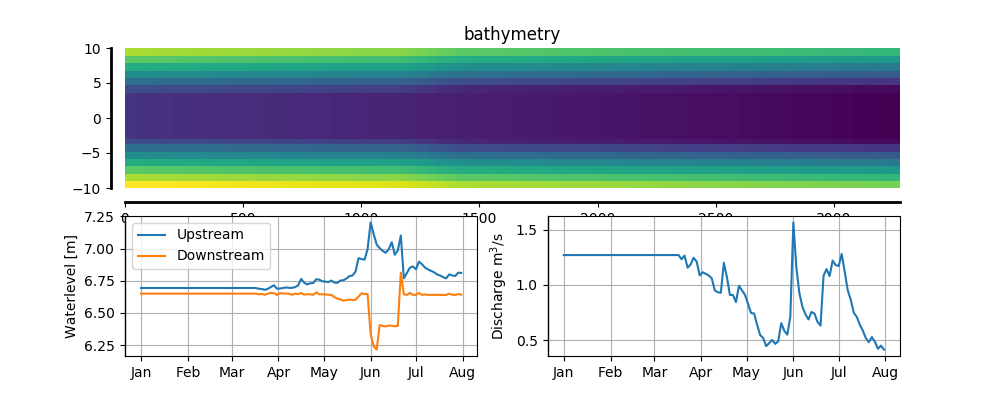

In [3]:
deltabeek.dash()

Door het model te draaien, wordt elke tijdstap de evenwichtstoestand van het systeem berekend. Deze aanpak wordt soms 'quasi-stationair' genoemd. 

2018-02-01 16:09:40 - models.py - INFO - start model run
100%|████████████████████████████████████████| 107/107 [00:01<00:00, 83.40it/s]
2018-02-01 16:09:41 - models.py - INFO - Written waterlevel to ../cases/grotebeek\output\waterlevel.csv
2018-02-01 16:09:41 - models.py - INFO - Written waterdepth to ../cases/grotebeek\output\waterdepth.csv
2018-02-01 16:09:41 - models.py - INFO - Written friction to ../cases/grotebeek\output\friction.csv
2018-02-01 16:09:41 - models.py - INFO - Written blockage to ../cases/grotebeek\output\blockage.csv


<IPython.core.display.Javascript object>


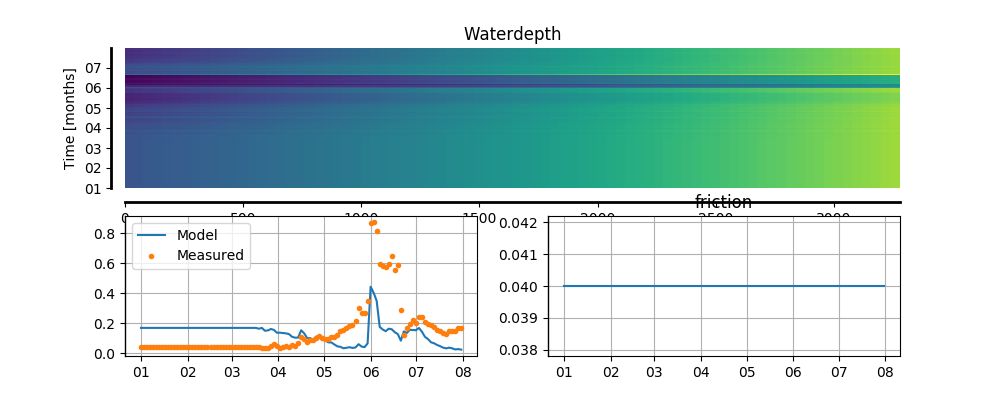

In [9]:
deltabeek.run()
deltabeek.dash(dashtype=2)

De vergelijking tussen modeluitvoer en metingen is niet goed. Daarom gaan we de ruwheid automatisch kalibreren. Dat doen we met de *estimate_roughness* functie uit de tools bibliotheek. Met de parameter 'every' kunnen we instellen om de hoeveel tijdstappen we de ruwheid willen bepalen:

In [10]:
tools.estimate_roughness(deltabeek, every=5)

2018-02-01 16:09:48 - tools.py - INFO - Optimising model-wide roughness factor
100%|████████████████████████████████████████| 107/107 [00:06<00:00, 15.67it/s]


,0.0,40.0,80.0,120.0,160.0,200.0,240.0,280.0,320.0,360.0,...,2920.0,2960.0,3000.0,3040.0,3080.0,3120.0,3160.0,3200.0,3240.0,3280.0
2016-01-01,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-03,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-05,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-07,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-09,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-11,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-13,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-15,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-17,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750
2016-01-19,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,...,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750


Na deze automatische kalibratie kunnen we het model opnieuw draaien, en de modeluitvoer bekijken:

2018-02-01 16:10:00 - models.py - INFO - start model run
100%|████████████████████████████████████████| 107/107 [00:01<00:00, 85.87it/s]
2018-02-01 16:10:02 - models.py - INFO - Written waterlevel to ../cases/grotebeek\output\waterlevel.csv
2018-02-01 16:10:02 - models.py - INFO - Written waterdepth to ../cases/grotebeek\output\waterdepth.csv
2018-02-01 16:10:02 - models.py - INFO - Written friction to ../cases/grotebeek\output\friction.csv
2018-02-01 16:10:02 - models.py - INFO - Written blockage to ../cases/grotebeek\output\blockage.csv


<IPython.core.display.Javascript object>


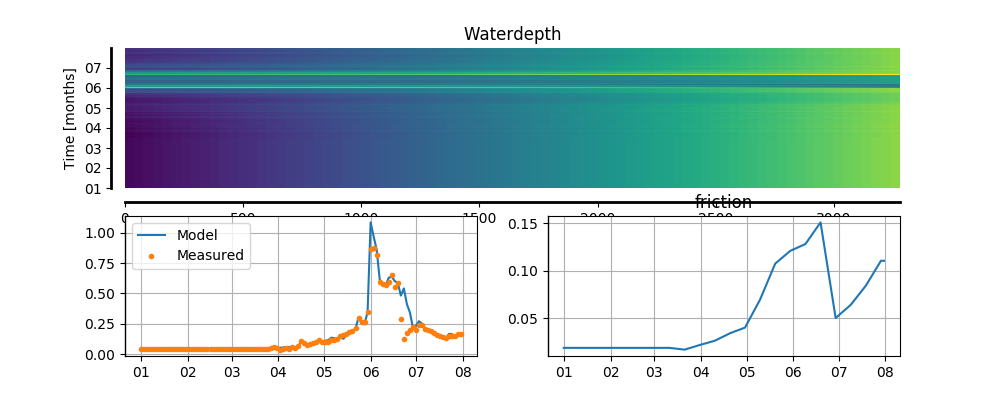

In [11]:
deltabeek.run()
deltabeek.dash(dashtype=2)

De modeluitvoer ligt nu veel dichter op de metingingen. Uit de grafiek van de ruwheden kunnen we duidelijk de groeicurve aflezen. 
